In [2]:
import pandas as pd
import os
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
from torch.autograd import Variable

is_cuda_available = torch.cuda.is_available()
print(f"CUDA Available: {is_cuda_available}")

device = torch.device("cuda" if is_cuda_available else "cpu")
print(f"Using device: {device}")


CUDA Available: True
Using device: cuda


In [3]:
directory = r"C:\Users\mahrouaa\CS283_Project\DataPump\CS283\new_1m_binance"

all_highs = pd.DataFrame()

for filename in os.listdir(directory):
    if filename.endswith(".csv"): 
        file_path = os.path.join(directory, filename)
        df = pd.read_csv(file_path)
        high_series = df['High']
        all_highs = pd.concat([all_highs, high_series.rename(filename)], axis=1)

all_highs.reset_index(drop=True, inplace=True)

all_highs

,10.csv,100.csv,102.csv,103.csv,105.csv,107.csv,108.csv,109.csv,11.csv,110.csv,...,86.csv,87.csv,88.csv,89.csv,9.csv,92.csv,94.csv,95.csv,97.csv,99.csv
0,0.000011,0.000004,0.000004,0.000004,0.04158,1.140000e-06,0.000001,6.800000e-07,0.000010,0.000014,...,0.000027,0.000035,0.000027,0.000024,0.000017,0.000004,0.000003,0.000004,0.000004,0.000004
1,0.000011,0.000004,0.000004,0.000004,0.04165,1.140000e-06,0.000001,6.800000e-07,0.000010,0.000014,...,0.000027,0.000035,0.000027,0.000024,0.000017,0.000004,0.000003,0.000004,0.000004,0.000004
2,0.000011,0.000004,0.000004,0.000004,0.04165,1.140000e-06,0.000001,6.800000e-07,0.000010,0.000014,...,0.000027,0.000035,0.000027,0.000024,0.000017,0.000004,0.000003,0.000004,0.000004,0.000004
3,0.000011,0.000004,0.000004,0.000004,0.04165,1.140000e-06,0.000001,6.800000e-07,0.000010,0.000014,...,0.000027,0.000035,0.000027,0.000024,0.000017,0.000004,0.000003,0.000004,0.000004,0.000004
4,0.000011,0.000004,0.000004,0.000004,0.04165,1.140000e-06,0.000001,6.800000e-07,0.000010,0.000014,...,0.000027,0.000035,0.000027,0.000024,0.000017,0.000004,0.000003,0.000004,0.000004,0.000004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.000011,0.000003,0.000004,0.000004,0.04204,9.500000e-07,0.000001,6.700000e-07,0.000011,0.000016,...,0.000027,0.000035,0.000029,0.000024,0.000019,0.000005,0.000003,0.000004,0.000005,0.000004
996,0.000011,0.000003,0.000004,0.000004,0.04201,9.500000e-07,0.000001,6.700000e-07,0.000011,0.000016,...,0.000027,0.000035,0.000029,0.000024,0.000019,0.000005,0.000003,0.000004,0.000005,0.000004
997,0.000011,0.000003,0.000004,0.000004,0.04203,9.500000e-07,0.000001,6.700000e-07,0.000011,0.000016,...,0.000027,0.000035,0.000029,0.000024,0.000019,0.000005,0.000003,0.000004,0.000005,0.000004
998,0.000011,0.000003,0.000004,0.000004,0.04201,9.500000e-07,0.000001,6.700000e-07,0.000011,0.000016,...,0.000027,0.000035,0.000029,0.000024,0.000019,0.000005,0.000003,0.000004,0.000005,0.000004


In [4]:
normalized_data = all_highs.apply(lambda x: -1 + 2 * (x - x.min()) / (x.max() - x.min()), axis=0)
normalized_data_tensor = torch.tensor(normalized_data.values).float().transpose(0, 1).to(device)
print(normalized_data_tensor.shape)

torch.Size([466, 1000])


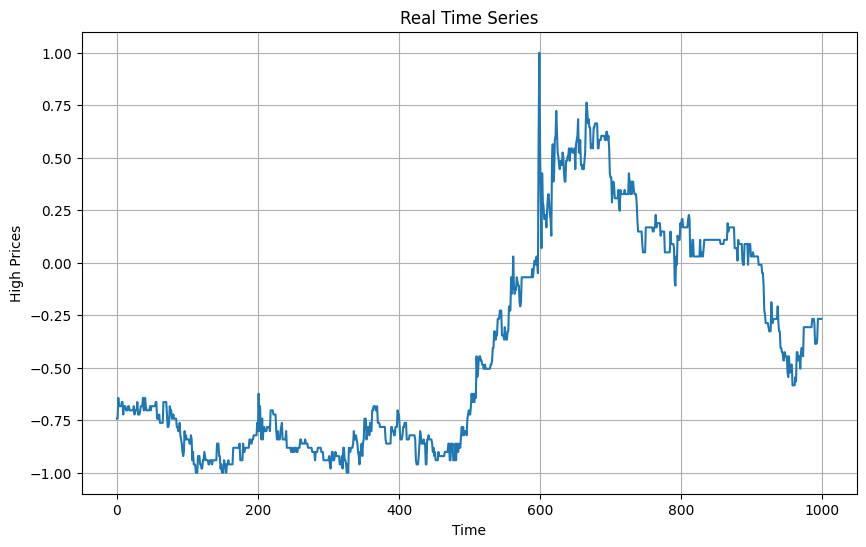

In [5]:
import matplotlib.pyplot as plt

normalized_data_cpu = normalized_data_tensor.cpu()

plt.figure(figsize=(10, 6))  
plt.plot(normalized_data_cpu[0])  
plt.title('Real Time Series')  
plt.xlabel('Time')  
plt.ylabel('High Prices')  
plt.grid(True)  
plt.show()


In [6]:
def generate_sample(generator, input_size, epoch):

    generator.eval()
    with torch.no_grad():
        noise = torch.randn(1, input_size).to(device)
        generated_sample = generator(noise)
        
        plt.figure(figsize=(10, 2))
        plt.plot(generated_sample.cpu().numpy().reshape(-1))
        plt.title(f"Generated Sample at Epoch {epoch}")
        plt.show()
            


c:\Users\mahrouaa\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


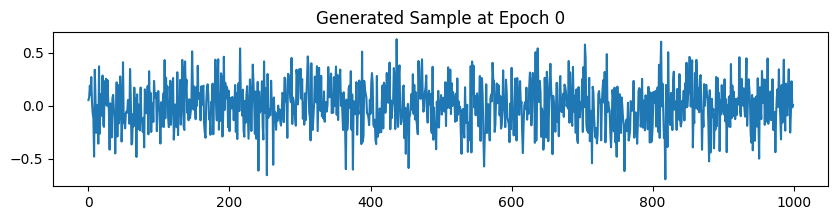

  5%|▍         | 499/10000 [18:27<6:46:33,  2.57s/it]

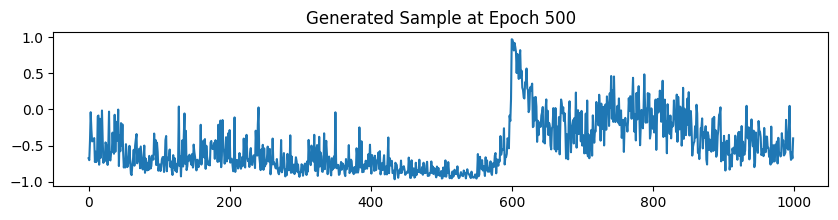

 10%|▉         | 999/10000 [37:38<4:53:25,  1.96s/it] 

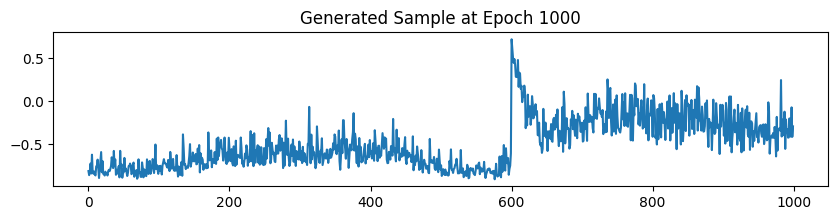

 15%|█▍        | 1499/10000 [54:53<4:43:49,  2.00s/it] 

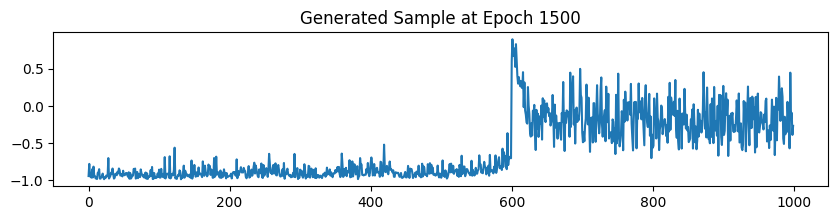

 20%|█▉        | 1999/10000 [1:10:21<4:20:40,  1.95s/it]

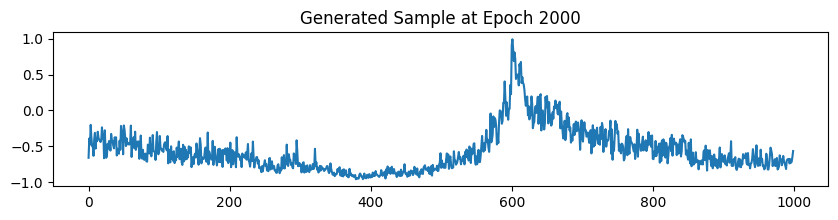

 25%|██▍       | 2499/10000 [1:26:52<3:51:20,  1.85s/it] 

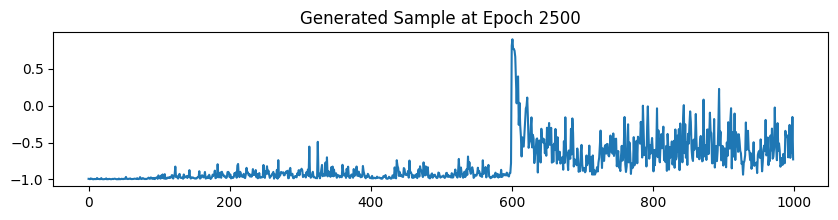

 30%|██▉       | 2999/10000 [1:43:53<3:12:34,  1.65s/it]

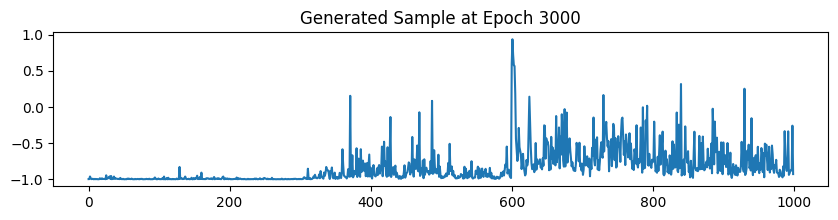

 35%|███▍      | 3499/10000 [2:00:19<3:30:05,  1.94s/it]

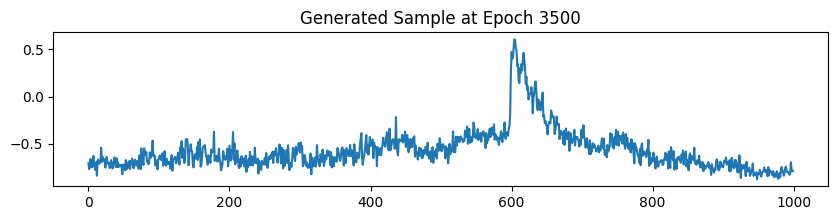

 40%|███▉      | 3999/10000 [2:16:40<2:57:36,  1.78s/it]

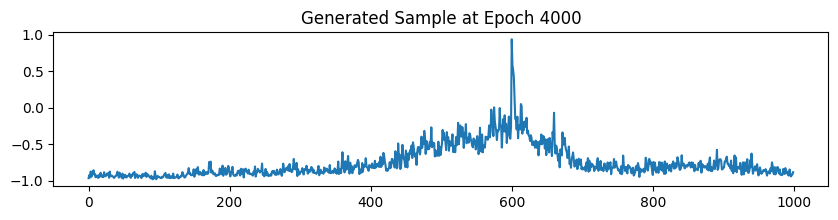

 45%|████▍     | 4499/10000 [2:32:01<2:49:08,  1.84s/it]

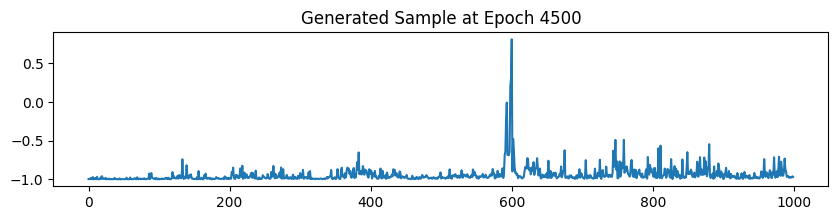

 50%|████▉     | 4999/10000 [2:47:29<2:15:49,  1.63s/it]

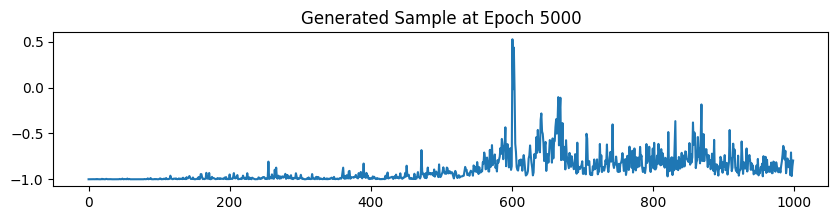

 55%|█████▍    | 5499/10000 [3:03:26<2:06:24,  1.69s/it]

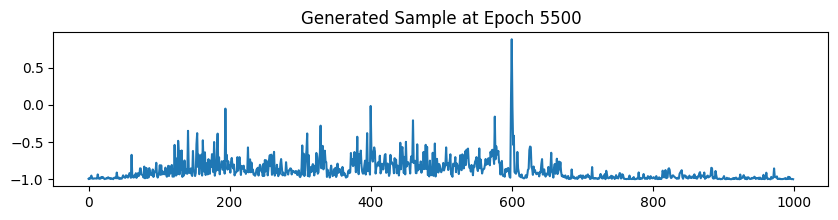

 60%|█████▉    | 5999/10000 [3:18:52<2:05:18,  1.88s/it]

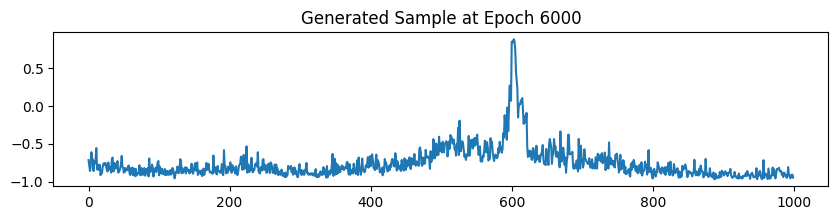

 65%|██████▍   | 6499/10000 [3:34:44<2:29:40,  2.57s/it]

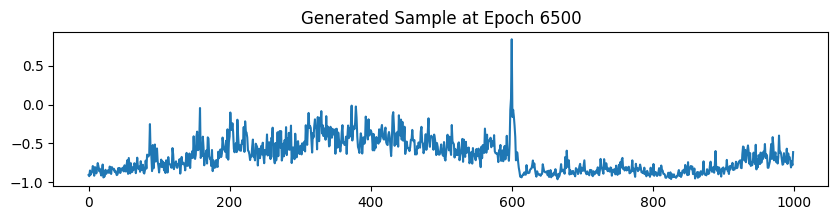

 70%|██████▉   | 6999/10000 [3:51:19<1:43:36,  2.07s/it]

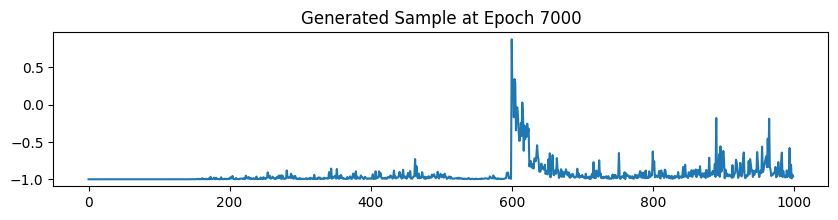

 75%|███████▍  | 7499/10000 [4:06:57<2:22:15,  3.41s/it]

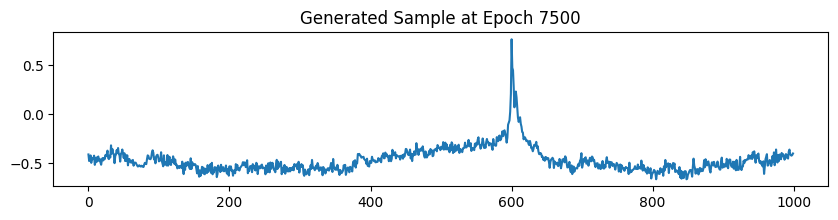

 80%|███████▉  | 7999/10000 [4:23:44<53:42,  1.61s/it]  

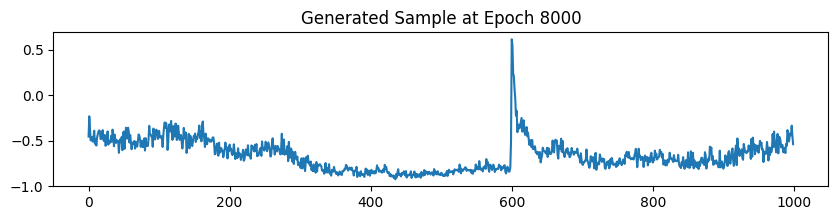

 85%|████████▍ | 8499/10000 [4:39:32<42:04,  1.68s/it]  

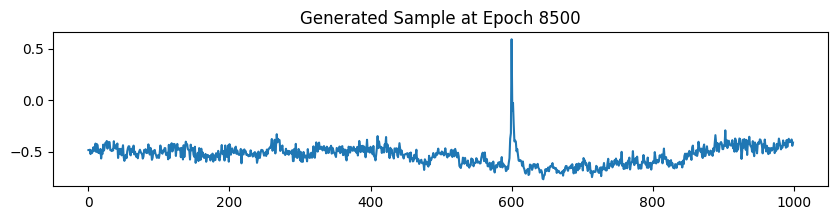

 90%|████████▉ | 8999/10000 [4:55:11<34:08,  2.05s/it]  

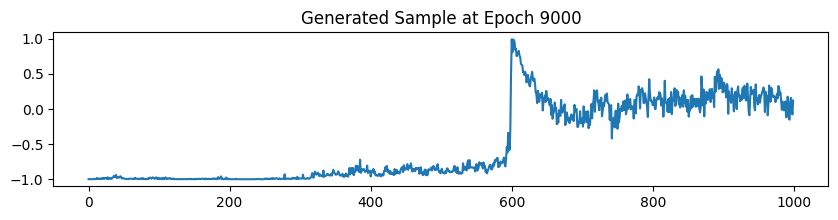

 95%|█████████▍| 9499/10000 [5:11:27<14:07,  1.69s/it]

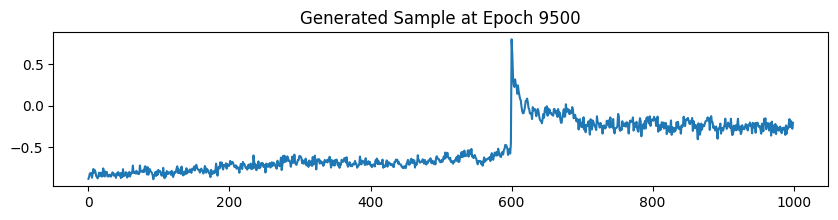

100%|█████████▉| 9999/10000 [5:27:45<00:01,  1.66s/it]

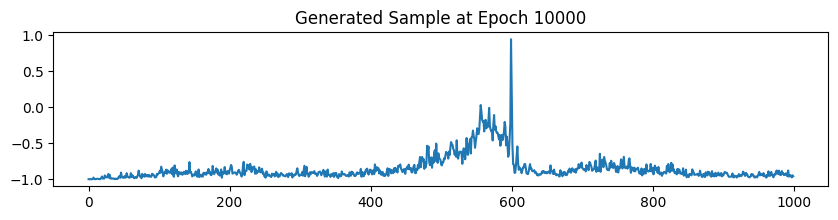

100%|██████████| 10000/10000 [5:27:46<00:00,  1.97s/it]


In [7]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from tqdm import tqdm

class Generator(nn.Module):
    def __init__(self, input_size, hidden_dim, output_size):
        super(Generator, self).__init__()
        self.fc = nn.Sequential(
            nn.Linear(input_size, hidden_dim),
            nn.ReLU(True),
            nn.Linear(hidden_dim, output_size),
            nn.Tanh()
        )
        
    def forward(self, x):
        return self.fc(x)

class Discriminator(nn.Module):
    def __init__(self, input_size, hidden_dim):
        super(Discriminator, self).__init__()
        self.fc = nn.Sequential(
            nn.Linear(input_size, hidden_dim),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(hidden_dim, 1),
            nn.Sigmoid() 
        )
        
    def forward(self, x):
        return self.fc(x)

input_size = 100  
hidden_dim = 256
output_size = 1000 
lr = 0.0002

G = Generator(input_size, hidden_dim, output_size).to(device)
D = Discriminator(output_size, hidden_dim).to(device)

optim_G = optim.Adam(G.parameters(), lr=lr)
optim_D = optim.Adam(D.parameters(), lr=lr)

criterion = nn.BCELoss()

batch_size = 1
dataset = TensorDataset(normalized_data_tensor)
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)


epochs = 10000
sample_interval = epochs // 20

generate_sample(G, input_size, epoch=0)

for epoch in tqdm(range(epochs)):
    for real_data_batch, in dataloader:
        real_data_batch = real_data_batch.to(device)
        batch_size = real_data_batch.size(0)
        real_data = real_data_batch.view(batch_size, -1) 

        D_real = D(real_data)
        lossD_real = criterion(D_real, torch.ones_like(D_real)).to(device)

        noise = torch.randn(batch_size, input_size).to(device)
        fake_data = G(noise).view(batch_size, -1)        
        D_fake = D(fake_data.detach())
        lossD_fake = criterion(D_fake, torch.zeros_like(D_fake)).to(device)

        D.zero_grad()
        lossD = (lossD_real + lossD_fake) / 2
        lossD.backward()
        optim_D.step()

        output = D(fake_data)
        lossG = criterion(output, torch.ones_like(output)).to(device)

        G.zero_grad()
        lossG.backward()
        optim_G.step()

    if (epoch + 1) % sample_interval == 0:
        generate_sample(G, input_size, epoch + 1)

    # print(f'Epoch [{epoch+1}/{epochs}] Loss D: {lossD.item()}, loss G: {lossG.item()}')
        
torch.save(G.state_dict(), 'pumpGAN.pth')


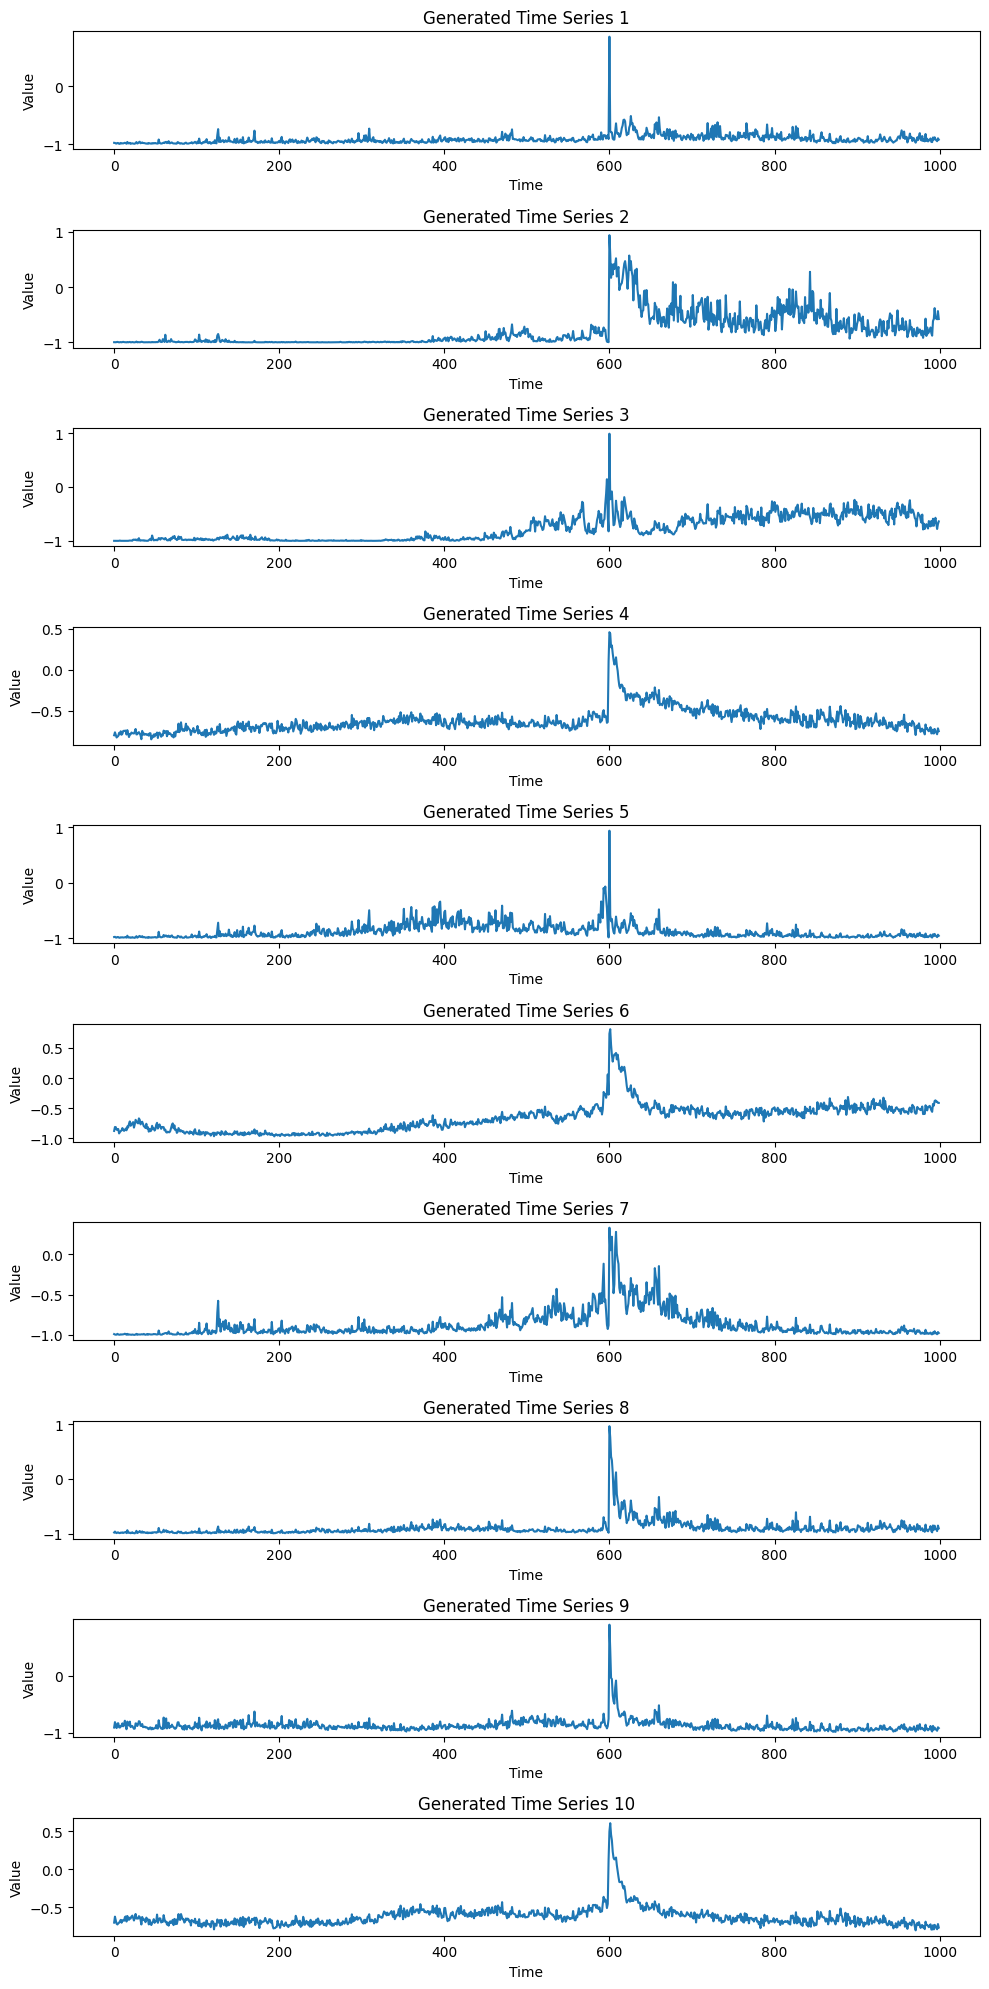

In [8]:
import torch
import matplotlib.pyplot as plt

G.eval()  

fig, axs = plt.subplots(10, 1, figsize=(10, 20)) 

for i in range(10):
    with torch.no_grad():
        noise = torch.randn(1, input_size).to(device)
        
        generated_time_series = G(noise)
    
    generated_time_series_cpu = generated_time_series.cpu()
    generated_time_series_np = generated_time_series_cpu.squeeze().numpy()
    
    axs[i].plot(generated_time_series_np)
    axs[i].set_title(f'Generated Time Series {i+1}')
    axs[i].set_xlabel('Time')
    axs[i].set_ylabel('Value')

plt.tight_layout()
plt.show()


In [9]:
noise = torch.randn(1, input_size).to(device)


In [10]:
from torchviz import make_dot

g = G(noise)
fake_data = torch.randn(1, 1000).to(device)

g_vis = make_dot(g, params=dict(list(G.named_parameters())))
g_vis.render("generator_visualization", format="png")  # This saves the visualization as a PNG file

d = D(fake_data)
d_vis = make_dot(d, params=dict(list(D.named_parameters())))
d_vis.render("discriminator_visualization", format="png")  # This saves the visualization as a PNG file


'discriminator_visualization.png'